# Proyecto 2

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrimos el primer fichero de csv
df_csv_origen = pd.read_csv("datos/exported_db_data.csv")
df_csv_origen.head(2)

,index,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
0,0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# creamos una copia del df_csv poniendo la columna index como index
df_csv = df_csv_origen.set_index(['index'], inplace=False)

In [4]:
# comprobamos que todo esta correcto porque es una pesadilla
df_csv.head(2)

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#abrimos el OTRO archivo csv como kaggle
df_kaggle_origen = pd.read_csv("datos/data_remaning_kaggle.csv", index_col= 0)
df_kaggle_origen.head(2)

,index,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
df_kaggle = df_kaggle_origen.set_index(['index'], inplace=False)

In [7]:
df_kaggle.sample(3)

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
20833,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sacred + Omniboard,NaN,Guild.ai,NaN,NaN,NaN,NaN,NaN,NaN
3974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import xml.etree.ElementTree as ET

In [9]:
tree = ET.parse('datos/data_xml_clean.xml')
root = tree.getroot()


xml_list = []
for child in root:
    xml_dict = {}
    for subchild in child:
        xml_dict[subchild.tag] = subchild.text
    xml_list.append(xml_dict) # Es una lista que contiene diccionarios

df_xml_origen = pd.DataFrame.from_dict(xml_list)

In [10]:
df_xml_origen.head(2)

,level_0,index,time,age,gender
0,0,0,910,50-54,Man
1,1,1,784,50-54,Man


In [11]:
df_xml = df_xml_origen.drop(['level_0'], axis=1)
df_xml.set_index(['index'], inplace= True)

In [12]:
df_xml.head(3)


,time,age,gender
index,,,
0,910,50-54,Man
1,784,50-54,Man
2,924,22-24,Man


In [13]:
# df_xml = pd.read_xml("datos/data_xml_clean.xml")
# df_xml.head(1)

In [14]:
f = open("datos/data_txt_clean.txt", mode='r', encoding='utf-8')
fichero_txt = f.readlines()

In [15]:
fichero_txt_lista = []
for i in fichero_txt:
    i = i.strip('\n')
    i = i.split(';')
    fichero_txt_lista.append(i)

In [16]:
df_txt = pd.DataFrame(fichero_txt_lista,columns= fichero_txt_lista[0])
df_txt.head()

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
1,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
2,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,null,null
3,2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,...,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,null,null,None of these activities are an important par...,"MySQL , MongoDB",None
4,3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,...,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,null,null


In [17]:
df_txt.set_index(['index'], inplace= True)
df_txt.drop(['index'],axis= 0, inplace= True)
df_txt.head()

,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,null,null
2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",...,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,null,null,None of these activities are an important par...,"MySQL , MongoDB",None
3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,"1000-9,999 employees",...,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,null,null
4,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,Academics/Education,50-249 employees,...,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,None,Microsoft Power BI


Tenemos ya los dataframes abiertos y limpios

Qué enseña Adalab
- SQL : MySQLWorkbench
- Python : VSCode
    - Pandas
    - Numpy
- Visualizacion:
    - Tableau
    - Matplotlib
    - Seaborn

Filtros
- Años de experiencia
- Tamaño de la empresa
    - Tamaño del equipo 
-

Preguntas de investigacion:
- Bases de Datos
    - Herramiantas más usadas por los Data Analyst    - Herramientas que quieren aprender los Data Analyst
    - 
- Tratamiento de Datos
    - Herramiantas más usadas por los Data Analyst
    - Herramientas que quieren aprender los Data Analyst
    - 
- Visualizacion
    - Herramiantas más usadas por los Data Analyst
    - Herramientas que quieren aprender los Data Analyst
    - 


In [18]:
df_csv.head(2)

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_kaggle.head(2)

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [20]:
df_txt.head(2)

,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,null,null


In [21]:
df_xml.head(2)

,time,age,gender
index,,,
0,910,50-54,Man
1,784,50-54,Man


In [22]:
df_csv.columns

Index(['Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5',
       'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10',
       'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_Part_14',
       'Q10_Part_15', 'Q10_Part_16', 'Q10_OTHER'],
      dtype='object')

# Exploración de los datos

In [23]:
def df_explore(dataframe, nombre):
    print(f"EXPLORACIÓN DEL DATAFRAME {nombre.upper()}")
    print("--------------")
    print(f"El dataframe {nombre} tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("--------------")
    print("Las primeras 5 columnas son:")
    display(dataframe.head())
    print("Las últimas 5 columnas son:")
    display(dataframe.tail())
    print("--------------")
    print("Una muestra de dos filas seleccionadas al azar:")
    display(dataframe.sample(2))
    print("--------------")
    print(f"El dataframe {nombre} tiene las siguientes columnas:")
    for col in dataframe.columns:
        print(col) 
    print("--------------")
    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe())
    print("--------------")
    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include=object))
    print("--------------")
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("--------------")
    print("El numero de valores distintos de cada columna es:")
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 6:
            print(col, len(dataframe[col].value_counts()))
        else:
            print(col, len(dataframe[col].value_counts()))
            print(f"Los valores son: {dataframe[col].unique()}")

In [24]:
df_explore(df_csv, 'Archivo csv')

EXPLORACIÓN DEL DATAFRAME ARCHIVO CSV
--------------
El dataframe Archivo csv tiene 25973 filas y 17 columnas
--------------
Las primeras 5 columnas son:


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN


Las últimas 5 columnas son:


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
25968,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN
25969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------
Una muestra de dos filas seleccionadas al azar:


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
8306,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Notebooks (AI Platform / Vertex AI),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4447,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------
El dataframe Archivo csv tiene las siguientes columnas:
Q10_Part_1
Q10_Part_2
Q10_Part_3
Q10_Part_4
Q10_Part_5
Q10_Part_6
Q10_Part_7
Q10_Part_8
Q10_Part_9
Q10_Part_10
Q10_Part_11
Q10_Part_12
Q10_Part_13
Q10_Part_14
Q10_Part_15
Q10_Part_16
Q10_OTHER
--------------
Los principales estadísticos de las variables numéricas son:


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
count,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
freq,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737


--------------
Los principales estadísticos de las variables categóricas son:


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
count,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
freq,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737


--------------
El porcentaje de nulos por columna:
Q10_Part_1: 63.39660416586456
Q10_Part_2: 62.2993108227775
Q10_Part_3: 95.91113848997036
Q10_Part_4: 99.19531821506949
Q10_Part_5: 93.18523081661726
Q10_Part_6: 99.32622338582374
Q10_Part_7: 95.89188772956531
Q10_Part_8: 97.10083548300157
Q10_Part_9: 98.66014707580949
Q10_Part_10: 92.10333808185423
Q10_Part_11: 93.09282716667309
Q10_Part_12: 97.72841027220576
Q10_Part_13: 99.03361182766719
Q10_Part_14: 98.99896045893813
Q10_Part_15: 99.43402764409194
Q10_Part_16: 72.37900897085436
Q10_OTHER: 97.16243791629769
--------------
El numero de valores distintos de cada columna es:
Q10_Part_1 1
Los valores son: [nan ' Kaggle Notebooks']
Q10_Part_2 1
Los valores son: ['Colab Notebooks' nan]
Q10_Part_3 1
Los valores son: [nan 'Azure Notebooks']
Q10_Part_4 1
Los valores son: [nan ' Paperspace / Gradient ']
Q10_Part_5 1
Los valores son: [nan ' Binder / JupyterHub ']
Q10_Part_6 1
Los valores son: [nan ' Code Ocean ']
Q10_Part_7 1
Los valores son: [

In [25]:
df_explore(df_kaggle, 'Archivo kaggle')

EXPLORACIÓN DEL DATAFRAME ARCHIVO KAGGLE
--------------
El dataframe Archivo kaggle tiene 25973 filas y 212 columnas
--------------
Las primeras 5 columnas son:


,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Las últimas 5 columnas son:


,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
25968,"General purpose image/video tools (PIL, cv2, s...",NaN,"Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


--------------
Una muestra de dos filas seleccionadas al azar:


,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
8580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------
El dataframe Archivo kaggle tiene las siguientes columnas:
Q18_Part_1
Q18_Part_2
Q18_Part_3
Q18_Part_4
Q18_Part_5
Q18_Part_6
Q18_OTHER
Q19_Part_1
Q19_Part_2
Q19_Part_3
Q19_Part_4
Q19_Part_5
Q19_OTHER
Q27_A_Part_1
Q27_A_Part_2
Q27_A_Part_3
Q27_A_Part_4
Q27_A_Part_5
Q27_A_Part_6
Q27_A_Part_7
Q27_A_Part_8
Q27_A_Part_9
Q27_A_Part_10
Q27_A_Part_11
Q27_A_OTHER
Q28
Q29_A_Part_1
Q29_A_Part_2
Q29_A_Part_3
Q29_A_Part_4
Q29_A_OTHER
Q30_A_Part_1
Q30_A_Part_2
Q30_A_Part_3
Q30_A_Part_4
Q30_A_Part_5
Q30_A_Part_6
Q30_A_Part_7
Q30_A_OTHER
Q31_A_Part_1
Q31_A_Part_2
Q31_A_Part_3
Q31_A_Part_4
Q31_A_Part_5
Q31_A_Part_6
Q31_A_Part_7
Q31_A_Part_8
Q31_A_Part_9
Q31_A_OTHER
Q36_A_Part_1
Q36_A_Part_2
Q36_A_Part_3
Q36_A_Part_4
Q36_A_Part_5
Q36_A_Part_6
Q36_A_Part_7
Q36_A_OTHER
Q37_A_Part_1
Q37_A_Part_2
Q37_A_Part_3
Q37_A_Part_4
Q37_A_Part_5
Q37_A_Part_6
Q37_A_Part_7
Q37_A_OTHER
Q38_A_Part_1
Q38_A_Part_2
Q38_A_Part_3
Q38_A_Part_4
Q38_A_Part_5
Q38_A_Part_6
Q38_A_Part_7
Q38_A_Part_8
Q38_A_Part_9
Q38_A

,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------
Los principales estadísticos de las variables categóricas son:


,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,2662,2740,2716,4373,1492,1439,119,2643,2023,748,...,633,591,4239,729,737,1020,666,2747,4542,377
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,"Generative Networks (GAN, VAE, etc)",None,Other,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decorder models (seq2seq, vanilla tran...","Contextualized embeddings (ELMo, CoVe)",...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,2662,2740,2716,4373,1492,1439,119,2643,2023,748,...,633,591,4239,729,737,1020,666,2747,4542,377


--------------
El porcentaje de nulos por columna:
Q18_Part_1: 89.75089516035884
Q18_Part_2: 89.45058329804027
Q18_Part_3: 89.54298694798445
Q18_Part_4: 83.16328494975551
Q18_Part_5: 94.25557309513725
Q18_Part_6: 94.45963115543063
Q18_OTHER: 99.54183190236014
Q19_Part_1: 89.82404804989798
Q19_Part_2: 92.21114234012244
Q19_Part_3: 97.12008624340662
Q19_Part_4: 90.94829245755207
Q19_Part_5: 94.87544758017941
Q19_OTHER: 99.58033342317022
Q27_A_Part_1: 85.6735841065722
Q27_A_Part_2: 90.56712740153236
Q27_A_Part_3: 87.90282216147538
Q27_A_Part_4: 97.79771300966388
Q27_A_Part_5: 98.25203095522274
Q27_A_Part_6: 98.88345589650791
Q27_A_Part_7: 98.94120817772301
Q27_A_Part_8: 98.4984406884072
Q27_A_Part_9: 99.00281061101913
Q27_A_Part_10: 99.33777384206675
Q27_A_Part_11: 89.64694105417163
Q27_A_OTHER: 98.70249874870058
Q28: 87.96057444269049
Q29_A_Part_1: 91.26015477611365
Q29_A_Part_2: 94.21322142224618
Q29_A_Part_3: 92.45370192122589
Q29_A_Part_4: 93.08897701459207
Q29_A_OTHER: 99.62268509606

In [26]:
df_explore(df_txt, 'Archivo txt')

EXPLORACIÓN DEL DATAFRAME ARCHIVO TXT
--------------
El dataframe Archivo txt tiene 25973 filas y 26 columnas
--------------
Las primeras 5 columnas son:


,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,null,null
2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",...,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,null,null,None of these activities are an important par...,"MySQL , MongoDB",None
3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,"1000-9,999 employees",...,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,null,null
4,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,Academics/Education,50-249 employees,...,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,None,Microsoft Power BI


Las últimas 5 columnas son:


,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
25968,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Never,1-2 years,Computers/Technology,"10,000 or more employees",...,"Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Seaborn","Scikit-learn , TensorFlow ,Keras ,PyTorch ,Xgb...","Linear or Logistic Regression, Gradient Boosti...",Analyze and understand data to influence produ...,"PostgreSQL , SQLite , MongoDB , Microsoft SQL...",Microsoft Power BI
25969,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,More than 25 times,1-2 years,null,null,...,null,Python,PyCharm,None,None,PyTorch,"Dense Neural Networks (MLPs, etc)",null,null,null
25970,Sweden,Doctoral degree,Research Scientist,I have never written code,null,null,null,null,Academics/Education,"1000-9,999 employees",...,"Basic statistical software (Microsoft Excel, G...",null,null,null,null,null,null,None of these activities are an important par...,null,null
25971,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,2-5 times,4-5 years,Online Service/Internet-based Services,"10,000 or more employees",...,null,"Python, SQL","Notepad++,Jupyter Notebook",None,"Matplotlib ,Seaborn",Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",null,null,null
25972,India,Bachelor’s degree,Business Analyst,I have never written code,null,null,null,null,Other,0-49 employees,...,"Advanced statistical software (SPSS, SAS, etc.)",null,null,null,null,null,null,Analyze and understand data to influence produ...,null,null


--------------
Una muestra de dos filas seleccionadas al azar:


,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
25815,Hong Kong (S.A.R.),Master’s degree,Data Analyst,10-20 years,Python,A laptop,Never,5-10 years,Medical/Pharmaceutical,"10,000 or more employees",...,"Advanced statistical software (SPSS, SAS, etc.)","Python, R","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Ggplot / ggplot2 ,Leaflet / Folium , Other","Scikit-learn ,Keras ,Xgboost",Linear or Logistic Regression,Analyze and understand data to influence produ...,SQLite,Tableau
4779,Russia,Bachelor’s degree,Student,< 1 years,Python,A laptop,Never,< 1 year,null,null,...,null,"Python, SQL","Visual Studio ,PyCharm",None,Matplotlib,Scikit-learn,null,null,null,null


--------------
El dataframe Archivo txt tiene las siguientes columnas:
Q3
Q4
Q5
Q6
Q8
Q11
Q13
Q15
Q20
Q21
Q22
Q23
Q25
Q26
Q33
Q35
Q41
Q7
Q9
Q12
Q14
Q16
Q17
Q24
Q32
Q34
--------------
Los principales estadísticos de las variables numéricas son:


,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
count,25973,25973,25973,25973,25973,25973,25973,25973,25973,25973,...,25973,25973,25973,25973,25973,25973,25973,25973,25973,25973
unique,66,7,15,7,14,7,6,10,19,6,...,7,826,1331,27,468,1402,757,97,1559,393
top,India,Master’s degree,Student,1-3 years,Python,A laptop,Never,< 1 year,null,null,...,null,Python,Jupyter Notebook,None,"Matplotlib ,Seaborn",null,null,null,null,null
freq,7434,10132,6804,7874,20213,16231,16457,9163,9648,9722,...,7484,4740,2341,13234,5697,6349,6658,10338,16489,16574


--------------
Los principales estadísticos de las variables categóricas son:


,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
count,25973,25973,25973,25973,25973,25973,25973,25973,25973,25973,...,25973,25973,25973,25973,25973,25973,25973,25973,25973,25973
unique,66,7,15,7,14,7,6,10,19,6,...,7,826,1331,27,468,1402,757,97,1559,393
top,India,Master’s degree,Student,1-3 years,Python,A laptop,Never,< 1 year,null,null,...,null,Python,Jupyter Notebook,None,"Matplotlib ,Seaborn",null,null,null,null,null
freq,7434,10132,6804,7874,20213,16231,16457,9163,9648,9722,...,7484,4740,2341,13234,5697,6349,6658,10338,16489,16574


--------------
El porcentaje de nulos por columna:
Q3: 0.0
Q4: 0.0
Q5: 0.0
Q6: 0.0
Q8: 0.0
Q11: 0.0
Q13: 0.0
Q15: 0.0
Q20: 0.0
Q21: 0.0
Q22: 0.0
Q23: 0.0
Q25: 0.0
Q26: 0.0
Q33: 0.0
Q35: 0.0
Q41: 0.0
Q7: 0.0
Q9: 0.0
Q12: 0.0
Q14: 0.0
Q16: 0.0
Q17: 0.0
Q24: 0.0
Q32: 0.0
Q34: 0.0
--------------
El numero de valores distintos de cada columna es:
Q3 66
Q4 7
Q5 15
Q6 7
Q8 14
Q11 7
Q13 6
Los valores son: ['2-5 times' 'Never' 'More than 25 times' 'null' 'Once' '6-25 times']
Q15 10
Q20 19
Q21 6
Los valores son: ['50-249 employees' '1000-9,999 employees' 'null'
 '10,000 or more employees' '0-49 employees' '250-999 employees']
Q22 8
Q23 7
Q25 27
Q26 7
Q33 21
Q35 17
Q41 7
Q7 826
Q9 1331
Q12 27
Q14 468
Q16 1402
Q17 757
Q24 97
Q32 1559
Q34 393


In [27]:
df_explore(df_xml, 'Archivo xml')

EXPLORACIÓN DEL DATAFRAME ARCHIVO XML
--------------
El dataframe Archivo xml tiene 25973 filas y 3 columnas
--------------
Las primeras 5 columnas son:


,time,age,gender
index,,,
0,910,50-54,Man
1,784,50-54,Man
2,924,22-24,Man
3,575,45-49,Man
4,781,45-49,Man


Las últimas 5 columnas son:


,time,age,gender
index,,,
25968,1756,30-34,Man
25969,253,22-24,Man
25970,494,50-54,Man
25971,277,45-49,Man
25972,255,18-21,Man


--------------
Una muestra de dos filas seleccionadas al azar:


,time,age,gender
index,,,
18292,640,22-24,Man
701,152,18-21,Man


--------------
El dataframe Archivo xml tiene las siguientes columnas:
time
age
gender
--------------
Los principales estadísticos de las variables numéricas son:


,time,age,gender
count,25973,25973,25973
unique,4421,11,5
top,484,25-29,Man
freq,44,4931,20598


--------------
Los principales estadísticos de las variables categóricas son:


,time,age,gender
count,25973,25973,25973
unique,4421,11,5
top,484,25-29,Man
freq,44,4931,20598


--------------
El porcentaje de nulos por columna:
time: 0.0
age: 0.0
gender: 0.0
--------------
El numero de valores distintos de cada columna es:
time 4421
age 11
gender 5
Los valores son: ['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe']


In [28]:
df_uniones = df_xml.join(df_txt, on = "index")
df_uniones.head()

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,null,null
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,...,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,null,null,None of these activities are an important par...,"MySQL , MongoDB",None
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,...,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,null,null
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,None,Microsoft Power BI


In [29]:
df_uniones2 = df_csv.join(df_kaggle, on = "index")
df_uniones2.head()

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_uniones.reset_index(drop = True, inplace= True)

In [31]:
df_uniones2.reset_index(drop = True, inplace= True)

In [32]:
df_union_final = pd.concat([df_uniones,df_uniones2], axis=1)
df_union_final.head(2)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [33]:
pd.options.display.max_columns = None

In [34]:
df_union_final.head(2)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,null,null,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
df_union_final.to_csv('datos/csv_df_completo.csv')

In [35]:
df_union_final["Q5"].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: Q5, dtype: int64

In [36]:
df_da = df_union_final[df_union_final["Q5"] == "Data Analyst"]
df_da.head()

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,Energy/Mining,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,"2,000-2,999",$0 ($USD),null,null,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,null,null,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-c

In [37]:
df_q8 = df_da['Q8'].value_counts().reset_index()
df_q8

,index,Q8
0,Python,1587
1,SQL,261
2,R,199
3,null,144
4,C++,22
5,Java,18
6,Other,16
7,C,12
8,MATLAB,11
9,None,10


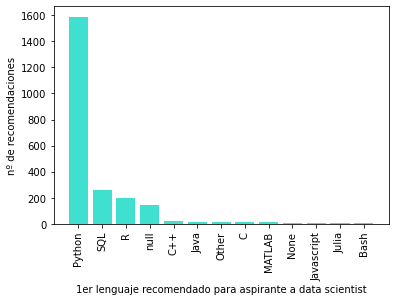

In [38]:
plt.figure()
plt.bar(df_q8['index'], df_q8['Q8'], color='turquoise')
plt.xlabel('1er lenguaje recomendado para aspirante a data scientist')
plt.ylabel('nº de recomendaciones') 
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
df_da.sample(2)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
11058,423,22-24,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Never,< 1 year,null,null,null,null,null,null,null,null,null,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Scikit-learn,null,null,null,null,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,IBM Watson Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [40]:
# filtramos por país
df_da_esp = df_da[df_da['Q3'] == 'Spain']
df_da_esp.sample(1)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
6132,468192,35-39,Man,Spain,Master’s degree,Data Analyst,10-20 years,Python,A personal computer / desktop,2-5 times,2-3 years,Computers/Technology,50-249 employees,0,No (we do not use ML methods),null,null,null,null,null,"Python, R, SQL, C++, Java, Bash","RStudio , Spyder, Notepad++,Jupyter Notebook",Google Cloud TPUs,"Matplotlib ,Seaborn","Scikit-learn , TensorFlow ,Xgboost ,LightGBM ,...","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,null,null,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [41]:
df_da['Q3'].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'India', 'Israel', 'Colombia', 'Brazil', 'Ukraine',
       'Pakistan', 'Other', 'Canada', 'Nigeria', 'Tunisia', 'Italy',
       'Spain', 'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Russia',
       'Peru', 'Germany', 'France', 'Greece', 'Taiwan', 'Portugal',
       'Australia', 'Philippines', 'Singapore', 'Netherlands', 'Japan',
       'Mexico', 'Saudi Arabia', 'Argentina', 'Ghana', 'Morocco',
       'Poland', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Viet Nam',
       'United Arab Emirates', 'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Sweden', 'Iraq',
       'Ireland', 'Denmark', 'Uganda', 'Belarus', 'Nepal', 'Austria',
       'Chile', 'Kazakhstan', 'Norway'], dtype=object)

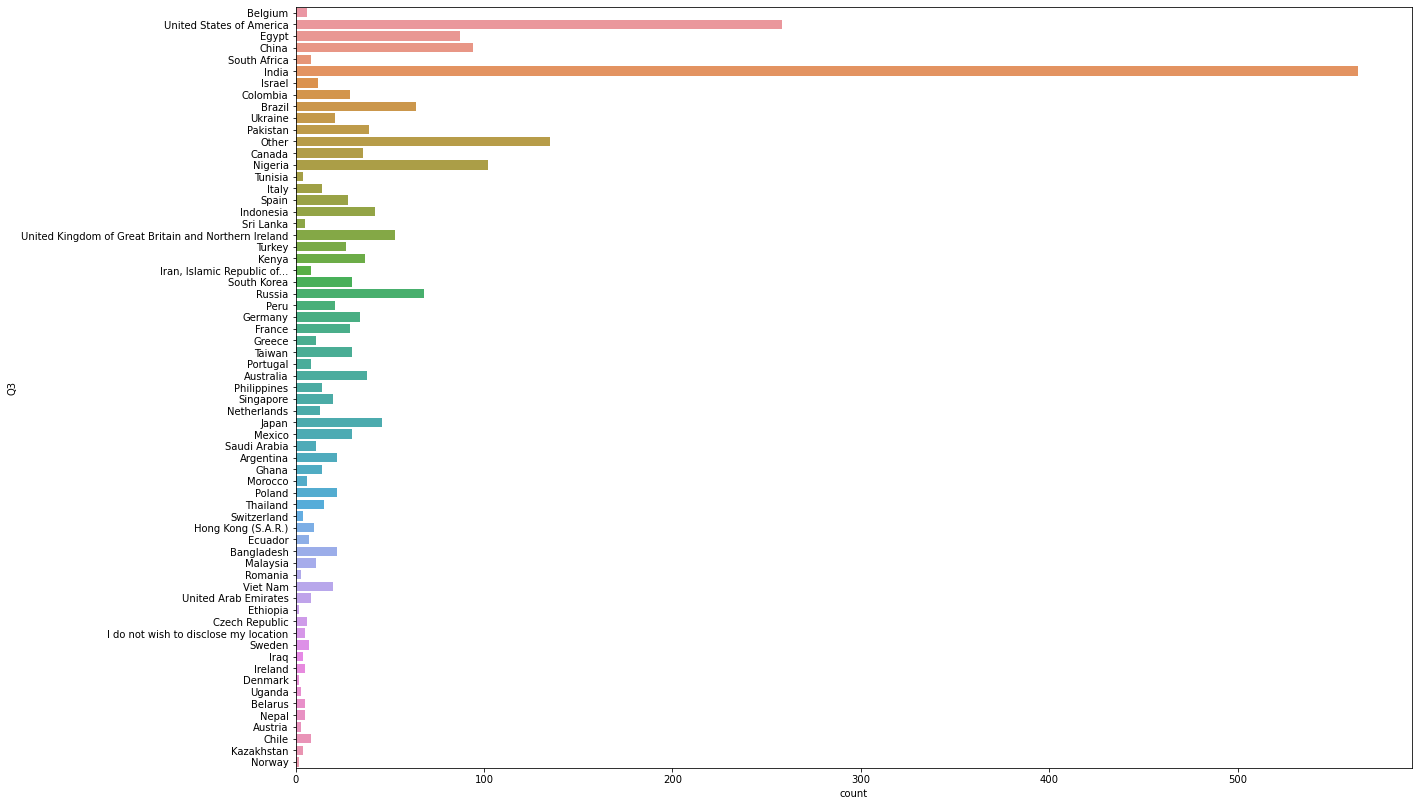

In [42]:
# sacamos la encuesta por países
plt.figure(figsize=(20,14))

fig = sns.countplot(y = 'Q3', data = df_da)

plt.show()

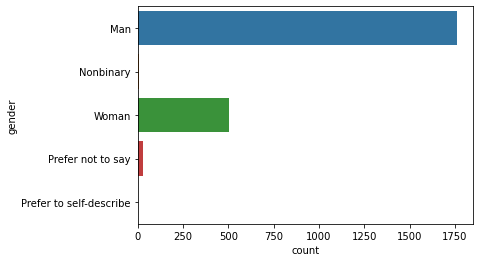

In [43]:
plt.figure()

fig = sns.countplot(y = 'gender', data = df_da)

plt.show()

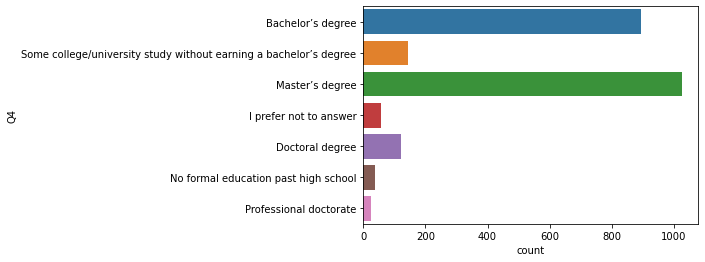

In [44]:
plt.figure()

fig = sns.countplot(y = 'Q4', data = df_da)

plt.show()

In [45]:
df_da['Q7'].value_counts()

Python, SQL                                466
Python                                     315
Python, R, SQL                             259
null                                       143
Python, R                                   97
                                          ... 
Python, R, Javascript, MATLAB                1
Python, R, SQL, Julia                        1
Python, R, Javascript, Bash                  1
Python, C, C++, Java, Other                  1
Python, R, SQL, Java, Javascript, Other      1
Name: Q7, Length: 214, dtype: int64